Importiere die notwendigen Bibliotheken

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import warnings
warnings.filterwarnings('ignore')


Datenerfassung und -vorbereitung

In [2]:
# Datenpfad
dataset_path = 'Rice_Image_Dataset'

# Labels und Bilder laden
images = []
labels = []

for subfolder in os.listdir(dataset_path):
    subfolder_path = os.path.join(dataset_path, subfolder)
    if not os.path.isdir(subfolder_path):
        continue
    for image_filename in os.listdir(subfolder_path):
        image_path = os.path.join(subfolder_path, image_filename)
        image = Image.open(image_path).resize((128, 128))
        images.append(np.array(image))
        labels.append(subfolder)

images = np.array(images)
labels = np.array(labels)

# Encode labels
label_to_index = {label: idx for idx, label in enumerate(np.unique(labels))}
index_to_label = {idx: label for label, idx in label_to_index.items()}
labels_encoded = np.array([label_to_index[label] for label in labels])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)


 Explorative Datenanalyse (EDA)


Shape of images:  (75000, 128, 128, 3)
Number of classes:  5


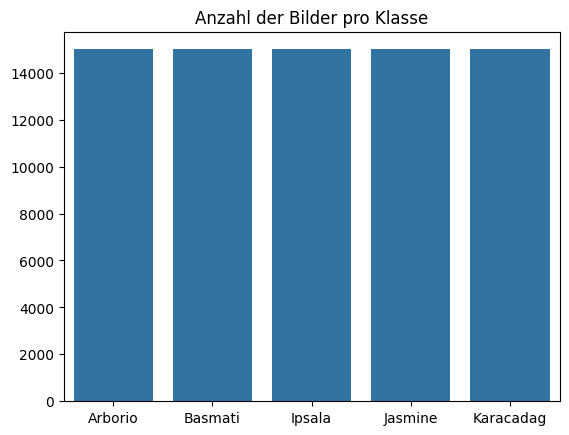

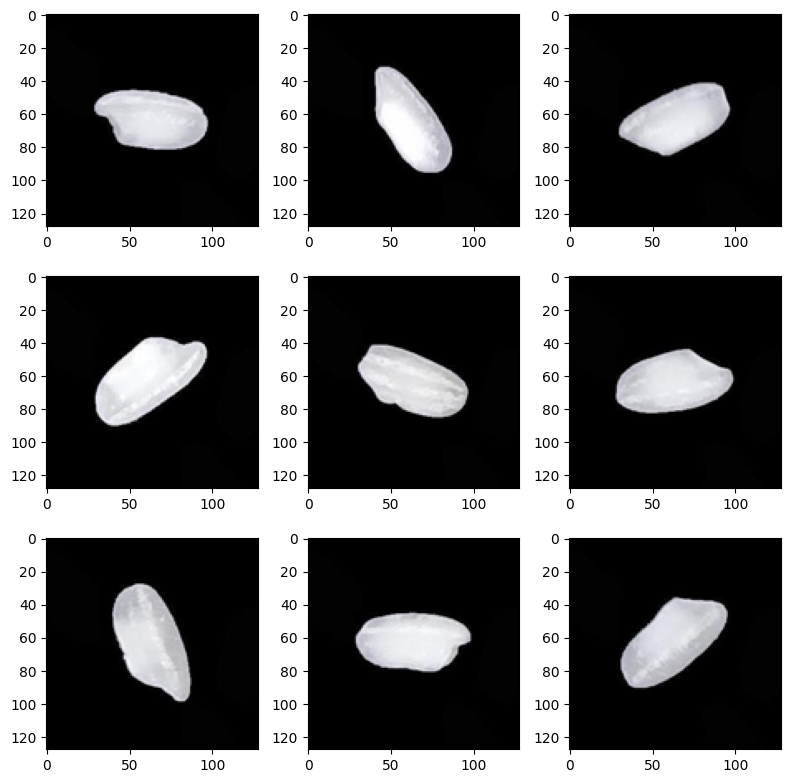

In [3]:
# 3.1. Analyse der Datenstrukturen
print("Shape of images: ", images.shape)
print("Number of classes: ", len(np.unique(labels)))

# 3.2. Erkennung von Mustern und Beziehungen
unique, counts = np.unique(labels, return_counts=True)
sns.barplot(x=unique, y=counts)
plt.title("Anzahl der Bilder pro Klasse")
plt.show()

# 3.3. Vorverarbeitung der Daten
# Beispielhafte Anzeige einiger Bilder
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
axes = axes.flatten()
for img, ax in zip(images[:9], axes):
    ax.imshow(img)
plt.tight_layout()
plt.show()

# Daten normalisieren
X_train = X_train / 255.0
X_test = X_test / 255.0


Modellauswahl und -vergleich

In [4]:
# CNN-Modell erstellen
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(labels)), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


 Datenaufteilung und Modelltraining

In [6]:
# Datenaugmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)

# Training
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=5, validation_data=(X_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 330s 175ms/step - accuracy: 0.9666 - loss: 0.0927 - val_accuracy: 0.8916 - val_loss: 0.3198
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 260s 138ms/step - accuracy: 0.9769 - loss: 0.0682 - val_accuracy: 0.9309 - val_loss: 0.2206
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 240s 128ms/step - accuracy: 0.9775 - loss: 0.0667 - val_accuracy: 0.9237 - val_loss: 0.2273
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 262s 139ms/step - accuracy: 0.9820 - loss: 0.0542 - val_accuracy: 0.9205 - val_loss: 0.2496
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 257s 137ms/step - accuracy: 0.9826 - loss: 0.0521 - val_accuracy: 0.9522 - val_loss: 0.1464


Modellbewertung und Optimierung

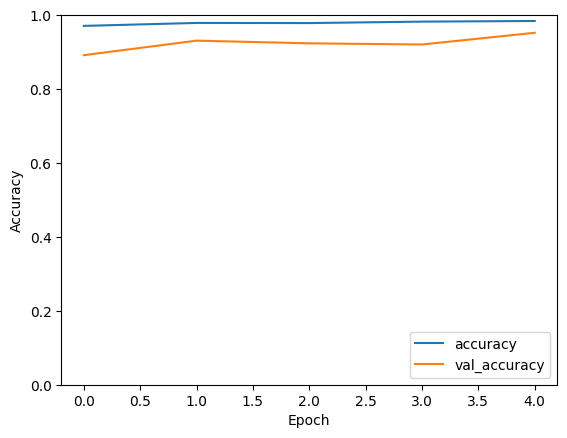

469/469 - 10s - 21ms/step - accuracy: 0.9522 - loss: 0.1464
Test Accuracy: 0.9521999955177307


In [7]:
# Bewertung der Modellleistung
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc}")


Zusammenfassung und Ausblick

In [8]:
# Schlussfolgerungen und wichtige Erkenntnisse
print("Das CNN-Modell hat erfolgreich verschiedene Reissorten klassifiziert.")
print("Test Accuracy: ", test_acc)


Das CNN-Modell hat erfolgreich verschiedene Reissorten klassifiziert.
Test Accuracy:  0.9521999955177307
